<a href="https://colab.research.google.com/github/kimdongha723/kdh723/blob/main/BTC_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pyupbit

In [ ]:
import pyupbit

In [ ]:
#BTC 최근 200시간의 데이터 불러옴
df = pyupbit.get_ohlcv("KRW-btc", interval="minute240")
df

,open,high,low,close,volume,value
2021-12-14 08:30:00,58833000.0,58833000.0,58500000.0,58543000.0,78.592941,4.608705e+09
2021-12-14 08:45:00,58549000.0,58749000.0,58461000.0,58626000.0,77.432456,4.535722e+09
2021-12-14 09:00:00,58626000.0,58727000.0,58158000.0,58304000.0,167.152286,9.762404e+09
2021-12-14 09:15:00,58304000.0,58748000.0,58080000.0,58709000.0,141.396050,8.245547e+09
2021-12-14 09:30:00,58718000.0,59177000.0,58694000.0,59145000.0,112.888686,6.658491e+09
...,...,...,...,...,...,...
2021-12-16 09:15:00,61128000.0,61519000.0,61113000.0,61439000.0,178.834405,1.098031e+10
2021-12-16 09:30:00,61442000.0,61500000.0,61243000.0,61500000.0,113.956357,6.997879e+09
2021-12-16 09:45:00,61500000.0,61660000.0,61400000.0,61419000.0,98.076330,6.038239e+09
2021-12-16 10:00:00,61400000.0,61430000.0,61000000.0,61000000.0,79.586246,4.870895e+09


In [ ]:
#시간(ds)와 종가(y)값만 남김
df = df.reset_index()
df['ds'] = df['index']
df['y'] = df['close']
data = df[['ds','y']]
data

,ds,y
0,2021-12-14 08:30:00,58543000.0
1,2021-12-14 08:45:00,58626000.0
2,2021-12-14 09:00:00,58304000.0
3,2021-12-14 09:15:00,58709000.0
4,2021-12-14 09:30:00,59145000.0
...,...,...
195,2021-12-16 09:15:00,61439000.0
196,2021-12-16 09:30:00,61500000.0
197,2021-12-16 09:45:00,61419000.0
198,2021-12-16 10:00:00,61000000.0


In [ ]:
#prophet 불러옴
from fbprophet import Prophet

In [ ]:
#학습
model = Prophet()
model.fit(data)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


In [ ]:
#24시간 미래 예측
future = model.make_future_dataframe(periods=50, freq='H')
forecast = model.predict(future)

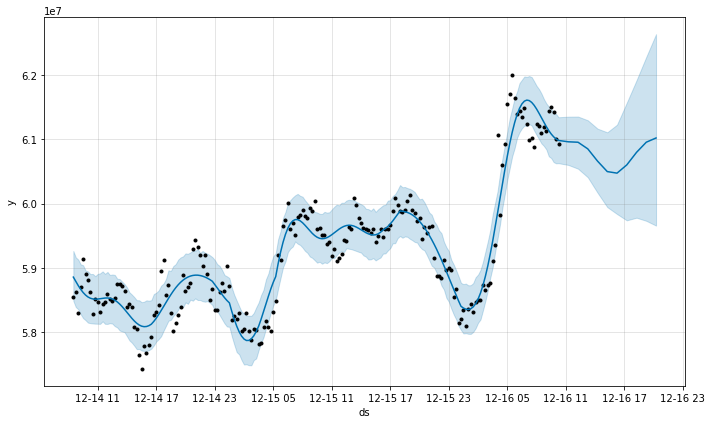

In [ ]:
#그래프1
fig1 = model.plot(forecast)

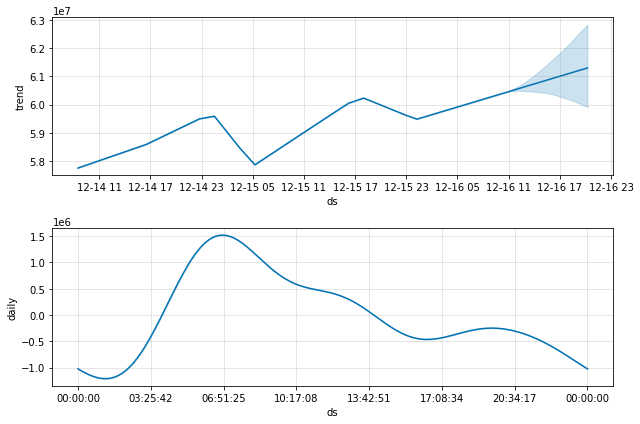

In [ ]:
#그래프2
fig2 = model.plot_components(forecast)